In [23]:
from sklearn.datasets import fetch_california_housing

In [24]:
data=fetch_california_housing()

In [25]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [26]:
import pandas as pd

In [27]:
x=pd.DataFrame(data.data,columns=data.feature_names)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
y=data.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dtr=DecisionTreeRegressor(max_depth=2)

In [54]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [87]:
import time 
start=time.time()
dtr.fit(x_train,y_train)
end=time.time()
print("Sec>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>",end-start)

Sec>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 0.09088134765625


In [55]:
dtr.score(x_train,y_train)

0.45204472816775954

In [56]:
decision_tree_prediction=dtr.predict(x_test)
decision_tree_prediction

array([1.35798601, 1.35798601, 2.0900204 , ..., 4.26226159, 1.35798601,
       2.0900204 ])

In [57]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,decision_tree_prediction)

0.4244060273337804

In [59]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.086\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.5, 'x[0] <= 3.074\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.827\nsamples = 6833\nvalue = 2.09'),
 Text(0.75, 0.5, 'x[0] <= 6.888\nsquared_error = 1.218\nsamples = 3411\nvalue = 3.348'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.908\nsamples = 2384\nvalue = 2.954'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.74\nsamples = 1027\nvalue = 4.262')]

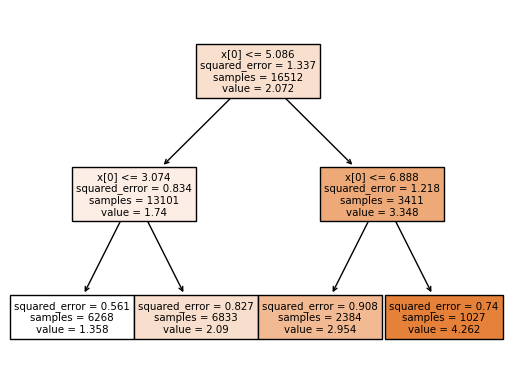

In [60]:
tree.plot_tree(dtr,filled=True)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
g=GradientBoostingRegressor(max_depth=2)


In [88]:
import time 
start=time.time()
g.fit(x_train,y_train)
end=time.time()
print("Sec>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>",end-start)

Sec>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 11.742017984390259


In [75]:

g.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=2)

In [69]:
g.score(x_train,y_train)

0.8048978817773166

In [91]:
gradient_predict=g.predict(x_test)
gradient_predict

array([0.72244724, 1.19044041, 3.68198652, ..., 4.48908162, 1.17609119,
       1.83915684])

In [92]:
r2_score(y_test,gradient_predict)

0.7368776609355634

In [94]:
g.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(max_depth=2)>

In [99]:
gg=g.estimators_[0,0]
gg

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      random_state=RandomState(MT19937) at 0x1AAC0BC5A40)

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.086\nfriedman_mse = 1.337\nsamples = 16512\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 3.074\nfriedman_mse = 0.834\nsamples = 13101\nvalue = -0.332'),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 0.561\nsamples = 6268\nvalue = -0.714'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 0.827\nsamples = 6833\nvalue = 0.018'),
 Text(0.75, 0.5, 'x[0] <= 6.888\nfriedman_mse = 1.218\nsamples = 3411\nvalue = 1.276'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.908\nsamples = 2384\nvalue = 0.882'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.74\nsamples = 1027\nvalue = 2.19')]

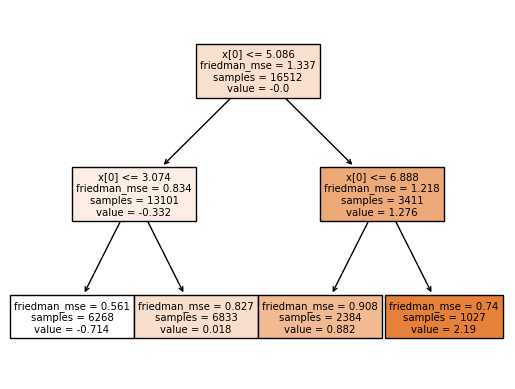

In [100]:
tree.plot_tree(gg,filled=True)